# **Boosting Techniques**

### **Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.**

Ans: Boosting is an ensemble learning technique that combines multiple weak learners (models that perform slightly better than random guessing) to form a strong learner.

It works by training models sequentially — each new model focuses more on the data points that previous models misclassified. By adjusting the weights of misclassified samples, boosting reduces bias and variance, leading to improved accuracy and robustness.

In short, boosting converts weak learners (e.g., shallow decision trees) into a powerful predictive model.


### **Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

Ans: **AdaBoost:**
- Adjusts sample weights based on misclassification errors.
- Focuses on correcting mistakes of previous learners.
- Combines weak learners using weighted majority voting.

**Gradient Boosting:**
- Uses gradients (errors) of the loss function to train the next model.
- Optimizes arbitrary loss functions (e.g., MSE, log loss).
- More flexible and powerful for both regression and classification.

**Summary:**
AdaBoost reweights samples, while Gradient Boosting fits new models to residual errors.


### **Question 3: How does regularization help in XGBoost?**

Ans: Regularization in XGBoost helps prevent overfitting by penalizing complex models.

- **L1 regularization (α)**: Adds a penalty for the absolute value of leaf weights → promotes sparsity.
- **L2 regularization (λ)**: Adds a penalty for the squared value of leaf weights → reduces overfitting.

By controlling these penalties, XGBoost balances bias and variance, leading to more generalizable models.


### **Question 4: Why is CatBoost considered efficient for handling categorical data?**

Ans: CatBoost efficiently handles categorical features by:
- Using **ordered encoding** instead of one-hot encoding to avoid target leakage.
- Converting categorical values into numerical statistics based on target averages.
- Reducing preprocessing time since encoding is done internally.
- Supporting GPU acceleration and handling missing values automatically.

This makes CatBoost ideal for datasets with many categorical variables.


### **Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

Ans: Boosting is preferred in:
- **Finance:** Credit scoring, fraud detection.
- **Healthcare:** Disease prediction from patient records.
- **Marketing:** Customer churn prediction.
- **E-commerce:** Recommendation systems.
- **Cybersecurity:** Spam and intrusion detection.

These applications benefit from boosting’s high accuracy and ability to handle imbalanced or noisy data.


### **Question 6: Write a Python program to:**
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9736842105263158


### **Question 7:  Write a Python program to:**
 - Train a Gradient Boosting Regressor on the California Housing dataset  
  - Evaluate performance using R-squared score

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R-squared Score:", r2_score(y_test, y_pred))


R-squared Score: 0.8004451261281281


### **Question 8: Write a Python program to:**
 - Train an XGBoost Classifier on the Breast Cancer dataset
 - Tune the learning rate using GridSearchCV
 - Print the best parameters and accuracy

In [3]:
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model and parameter grid
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}

# Grid search
grid = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Results
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:13:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.1}
Accuracy: 0.956140350877193


### **Question 9: Write a Python program to:**
 - Train a CatBoost Classifier
 - Plot the confusion matrix using seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.7 MB/s eta 0:00:00


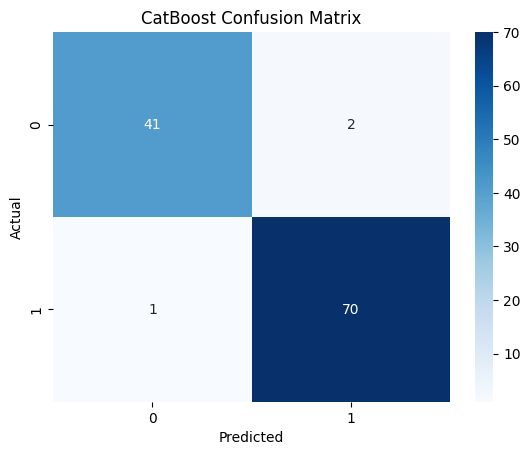

In [4]:
!pip install catboost seaborn

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost
model = CatBoostClassifier(iterations=200, learning_rate=0.1, verbose=0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.**
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
 - Data preprocessing & handling missing/categorical values
 - Choice between AdaBoost, XGBoost, or CatBoost
- Hyperparameter tuning strategy
 - Evaluation metrics you'd choose and why
 - How the business would benefit from your model




**Step 1: Data Preprocessing**
- Handle missing values using imputation (mean for numeric, mode for categorical).
- Encode categorical variables:
  - Use CatBoost (handles categorical data automatically).
- Normalize numerical features if needed.
- Handle imbalance using SMOTE or scale_pos_weight.

**Step 2: Model Choice**
- Use **CatBoost** for mixed (numeric + categorical) and imbalanced data.

**Step 3: Hyperparameter Tuning**
```python
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [200, 400]
}

cat = CatBoostClassifier(verbose=0)
grid = GridSearchCV(cat, param_grid=params, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)


**Step 4: Evaluation Metrics**
- **ROC-AUC:** For imbalanced data.
- **Precision, Recall, F1-score:** To measure classification quality.
- **Confusion Matrix:** For visual interpretation.

**Step 5: Business Impact**
- Helps identify risky loan applicants.
- Reduces financial losses due to defaults.
- Enhances credit risk assessment and decision-making.
